<a href="https://colab.research.google.com/github/beergil/case-studies/blob/main/artificial_neural_network_regression_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
tf.__version__

'2.13.0'

# Part 1 - Data Preprocessing


## Importing the dataset

In [3]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance
# X = dataset.iloc[:, : -1].values
# y = dataset.iloc[:,-1].values


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Converting categorical variables to dummy variables

In [5]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


## Creating X & y values (Features and Labels)

In [6]:
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [7]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [8]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Splitting the dataset into Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

# Part 2 - Building the ANN

## Model 1

In [10]:
# Set random seed
tf.random.set_seed(42)

# Creating model 1
ann_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compiling model 1
ann_1.compile(loss = 'mae',
              optimizer = 'SGD',
              metrics = ['mae'])

# Fitting model 1
ann_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8492.6025 - mae: 8492.6025
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7886.7422 - mae: 7886.7422
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7603.4399 - mae: 7603.4399
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7686.9668 - mae: 7686.9668
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7825.6577 - mae: 7825.6577
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7557.9492 - mae: 7557.9492
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7545.6255 - mae: 7545.6255
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7691.5581 - mae: 7691.5581
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7448.6113 - mae: 7448.6113
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7752.3823 - mae: 7752.3823

In [11]:
# Evaluating Model 1
ann_1.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7374.2227 - mae: 7374.2227


[7374.22265625, 7374.22265625]

## Model 2

In [12]:
# Set random seed
tf.random.set_seed(42)

# Creating the model
ann_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling the model
ann_2.compile(loss = 'mae',
              optimizer = 'Adam',
              metrics = ['mae'])

# Fitting the model
ann_2.fit(X_train, y_train, epochs=100)

# Fit the model and save the history (we can plot this)
history_2 = ann_2.fit(X_train, y_train, epochs=100, verbose=0)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13295.0117 - mae: 13295.0117
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13137.6582 - mae: 13137.6582
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12803.6729 - mae: 12803.6729
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12132.8975 - mae: 12132.8975
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10993.3018 - mae: 10993.3018
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9534.7100 - mae: 9534.7100
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8198.7969 - mae: 8198.7969
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7551.7827 - mae: 7551.7827
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7442.4404 - mae: 7442.4404
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7421.0723 - mae:

In [13]:
ann_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3496.8459 - mae: 3496.8459


[3496.845947265625, 3496.845947265625]

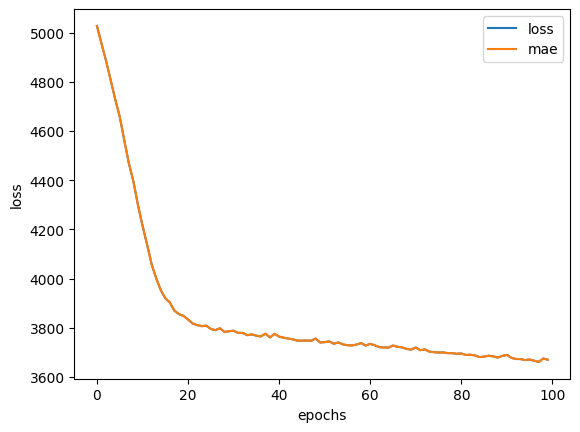

In [14]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

## Model 3

In [15]:
# Creating the model
ann_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, activation = 'relu'),  # adding 1rst layer
    tf.keras.layers.Dense(units = 100, activation = 'relu'),  # adding second layer
    tf.keras.layers.Dense(units = 1)                        # no activation function for regression
])

# Compiling the model
ann_3.compile(loss = 'mae',
              optimizer = 'adam',
              metrics = ['mae'])

# Fitting model
history_3 = ann_3.fit(X_train, y_train, batch_size = 32, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13304.7158 - mae: 13304.7158
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13143.0918 - mae: 13143.0918
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 12670.5713 - mae: 12670.5713
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 11584.2812 - mae: 11584.2812
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 9836.7939 - mae: 9836.7939
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 8136.4663 - mae: 8136.4663
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 7520.8047 - mae: 7520.8047
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 7472.5391 - mae: 7472.5391
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 7446.1343 - mae: 7446.1343
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7422.2144 - mae: 7

In [16]:
ann_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2403.8855 - mae: 2403.8855


[2403.885498046875, 2403.885498046875]

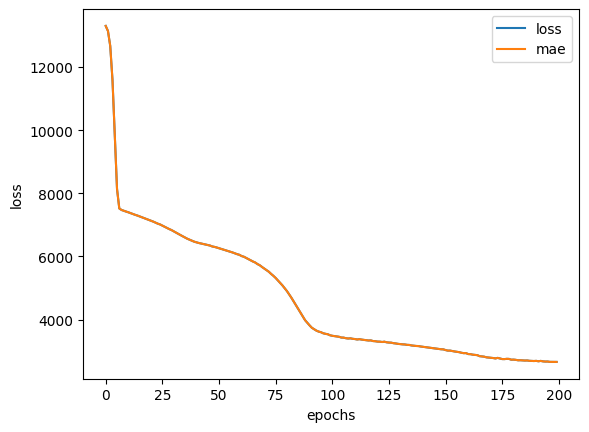

In [17]:
# Plot history (also known as a loss curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

# Preprocessing data (normalization and standardization)
### In terms of scaling values, neural network tend to prefer normalization.
### If you're not sure on which to use, you could try both and see which performs better

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis = 1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal=ct.transform(X_test)


In [20]:
# What does our data look like after transformation
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [21]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [22]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [23]:
# Build a NN model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss= 'mae',
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

#3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 13342.3311 - mae: 13342.3311
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 13331.7812 - mae: 13331.7812
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 13307.2051 - mae: 13307.2051
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 13258.2100 - mae: 13258.2100
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 13173.9434 - mae: 13173.9434
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 13043.5107 - mae: 13043.5107
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 12856.7246 - mae: 12856.7246
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 12603.5381 - mae: 12603.5381
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12273.8057 - mae: 12273.8057
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11865.02